In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

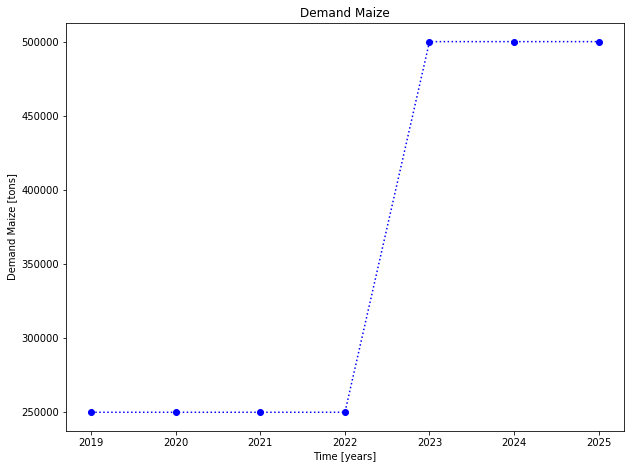

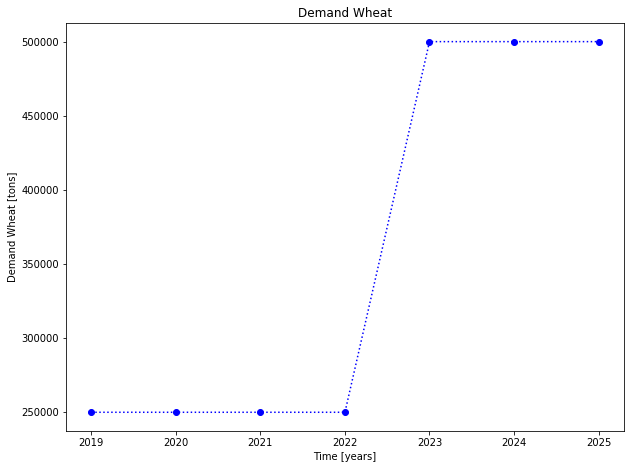

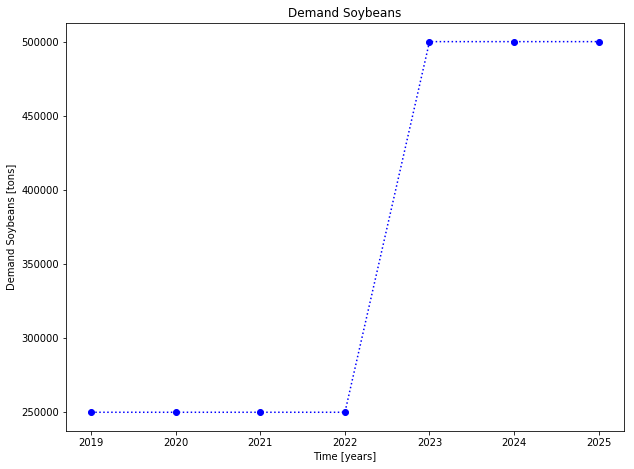

In [2]:
years = list(range(2019, 2019+7))

demand = []
for year in years:
    if year < 2023:
        demand.append(250_000)
    else:
        demand.append(500_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
maize.handysize_perc = 100
maize.handymax_perc = 0
maize.panamax_perc = 0
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

maize.scenario_data = pd.DataFrame(data=scenario_data)
maize.historic_data = []
wheat.scenario_data = pd.DataFrame(data=scenario_data)
wheat.historic_data = []
soybeans.scenario_data = pd.DataFrame(data=scenario_data)
soybeans.historic_data = []

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [4]:
Terminal = system.System(startyear = 2019, lifecycle = 7, elements = demand + vessels, debug=True,
                         crane_type_defaults=defaults.mobile_crane_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 18
     Handysize calls: 11
     Handymax calls: 3
     Panamax calls: 4
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.9397996357012751
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.47566904861986836
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.320958852926066
  Revenues (demand): 2250000
  Revenues (throughput): 0

Simulate year: 2020
  Total vessel calls: 18
     Handysize calls: 11
     Handymax calls: 3
     Pan

## Report all elements

In [6]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

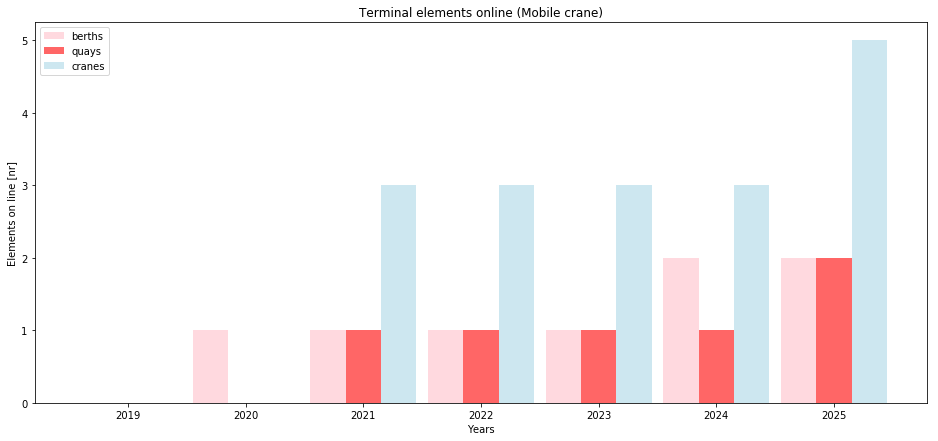

In [7]:
Terminal.terminal_elements_plot()

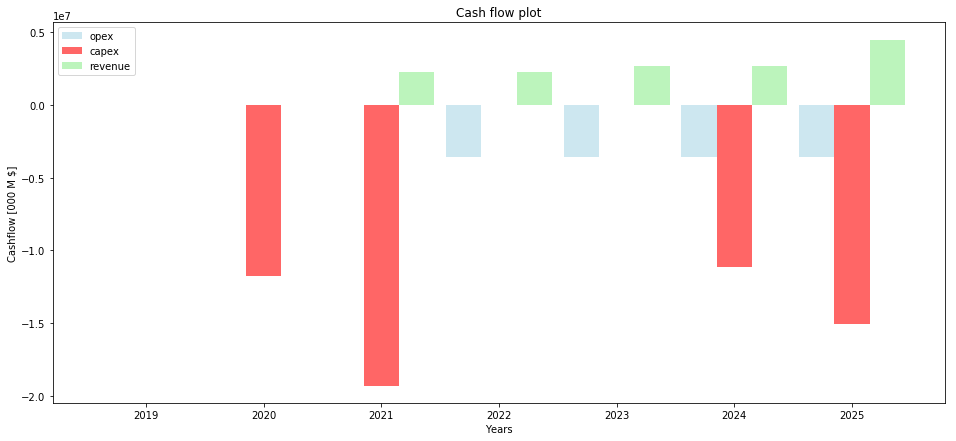

In [8]:
Terminal.cashflow_plot()

## SandBox

In [10]:
Terminal.NPV()

PV: [        0.   -11752800.   -17056450.    -1330981.25   -883195.25
 -12020827.25 -14157259.25]
NPV: -57201513.0
